In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
from tensorflow.python.keras.datasets import mnist
from tensorflow.contrib.eager.python import tfe

In [3]:
# enable eager mode
tf.enable_eager_execution()
tf.set_random_seed(0)
np.random.seed(0)

In [4]:
if not os.path.exists('weights/'):
    os.makedirs('weights/')

# image grid
new_im = Image.new('L', (280, 280))

# Hyper-parameters
image_size = 784
h_dim = 512
z_dim = 5  # set to larger values for slightly better reconstructions but poorer sampling
num_epochs = 15
batch_size = 100
learning_rate = 1e-3

In [5]:
# dataset loading
(x_train, y_train), (_, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape((x_train.shape[0], 28 * 28))

# Varientation Autoencoder

This is a direct port of the PyTorch version. The loss factor uses pixelwise scaling to correct for how PyTorch deals with such losses vs how Tensorflow deals with them.

A new utility method `decode` is added to wrap over the `decode_logits` version, which is used by using model(...)

In [6]:
class VAE(tf.keras.Model):
    def __init__(self):
        super(VAE, self).__init__()
        self.fc1 = tf.keras.layers.Dense(h_dim)
        self.fc2 = tf.keras.layers.Dense(z_dim)
        self.fc3 = tf.keras.layers.Dense(z_dim)
        self.fc4 = tf.keras.layers.Dense(h_dim)
        self.fc5 = tf.keras.layers.Dense(image_size)

    def encode(self, x):
        h = tf.nn.relu(self.fc1(x))
        return self.fc2(h), self.fc3(h)

    def reparameterize(self, mu, log_var):
        std = tf.exp(log_var * 0.5)
        eps = tf.random_normal(std.shape)
        return mu + eps * std

    def decode_logits(self, z):
        h = tf.nn.relu(self.fc4(z))
        return self.fc5(h)

    def decode(self, z):
        return tf.nn.sigmoid(self.decode_logits(z))

    def call(self, inputs, training=None, mask=None):
        mu, log_var = self.encode(inputs)
        z = self.reparameterize(mu, log_var)
        x_reconstructed_logits = self.decode_logits(z)
        return x_reconstructed_logits, mu, log_var

Epoch[1/15], Step [10/600], Reconst Loss: 311.6666, KL Div: 7345.2095
Epoch[1/15], Step [20/600], Reconst Loss: 243.9111, KL Div: 2428.8809
Epoch[1/15], Step [30/600], Reconst Loss: 205.9927, KL Div: 1583.0444
Epoch[1/15], Step [40/600], Reconst Loss: 213.4361, KL Div: 1015.3518
Epoch[1/15], Step [50/600], Reconst Loss: 207.2166, KL Div: 1189.8440
Epoch[1/15], Step [60/600], Reconst Loss: 188.0395, KL Div: 1210.9076
Epoch[1/15], Step [70/600], Reconst Loss: 179.6206, KL Div: 1048.7308
Epoch[1/15], Step [80/600], Reconst Loss: 175.2621, KL Div: 1187.8833
Epoch[1/15], Step [90/600], Reconst Loss: 174.0070, KL Div: 1098.3593
Epoch[1/15], Step [100/600], Reconst Loss: 166.4694, KL Div: 1225.7037
Epoch[1/15], Step [110/600], Reconst Loss: 162.9682, KL Div: 1165.9368
Epoch[1/15], Step [120/600], Reconst Loss: 163.4892, KL Div: 1111.4451
Epoch[1/15], Step [130/600], Reconst Loss: 170.8232, KL Div: 1083.1274
Epoch[1/15], Step [140/600], Reconst Loss: 171.1679, KL Div: 1114.5288
Epoch[1/15], St

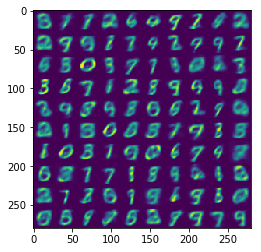

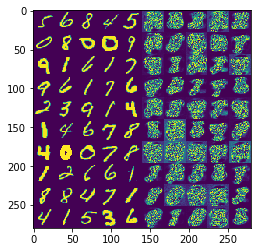

New images saved !
Epoch[2/15], Step [10/600], Reconst Loss: 138.7991, KL Div: 985.2478
Epoch[2/15], Step [20/600], Reconst Loss: 139.8328, KL Div: 1051.4362
Epoch[2/15], Step [30/600], Reconst Loss: 128.5976, KL Div: 1026.2367
Epoch[2/15], Step [40/600], Reconst Loss: 135.0098, KL Div: 1036.8267
Epoch[2/15], Step [50/600], Reconst Loss: 135.6119, KL Div: 1043.9861
Epoch[2/15], Step [60/600], Reconst Loss: 128.0628, KL Div: 1077.6635
Epoch[2/15], Step [70/600], Reconst Loss: 134.7421, KL Div: 919.8474
Epoch[2/15], Step [80/600], Reconst Loss: 128.5275, KL Div: 1035.8594
Epoch[2/15], Step [90/600], Reconst Loss: 136.2053, KL Div: 931.2224
Epoch[2/15], Step [100/600], Reconst Loss: 127.3091, KL Div: 1084.3433
Epoch[2/15], Step [110/600], Reconst Loss: 127.6282, KL Div: 1034.2377
Epoch[2/15], Step [120/600], Reconst Loss: 129.4361, KL Div: 1032.3240
Epoch[2/15], Step [130/600], Reconst Loss: 138.0188, KL Div: 1061.5031
Epoch[2/15], Step [140/600], Reconst Loss: 141.1097, KL Div: 1038.1926

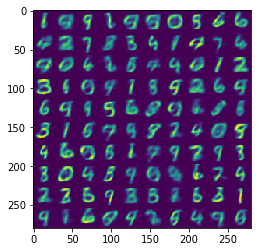

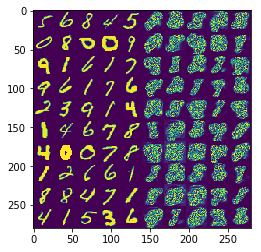

New images saved !
Epoch[3/15], Step [10/600], Reconst Loss: 131.3507, KL Div: 1004.8916
Epoch[3/15], Step [20/600], Reconst Loss: 133.0379, KL Div: 1065.8473
Epoch[3/15], Step [30/600], Reconst Loss: 123.3792, KL Div: 1032.4050
Epoch[3/15], Step [40/600], Reconst Loss: 128.5592, KL Div: 1066.9457
Epoch[3/15], Step [50/600], Reconst Loss: 128.9617, KL Div: 1107.4954
Epoch[3/15], Step [60/600], Reconst Loss: 122.2484, KL Div: 1107.3903
Epoch[3/15], Step [70/600], Reconst Loss: 128.0076, KL Div: 967.8378
Epoch[3/15], Step [80/600], Reconst Loss: 122.8041, KL Div: 1059.0781
Epoch[3/15], Step [90/600], Reconst Loss: 131.2527, KL Div: 967.5297
Epoch[3/15], Step [100/600], Reconst Loss: 122.4163, KL Div: 1097.9656
Epoch[3/15], Step [110/600], Reconst Loss: 121.4216, KL Div: 1074.8857
Epoch[3/15], Step [120/600], Reconst Loss: 124.7707, KL Div: 1072.5281
Epoch[3/15], Step [130/600], Reconst Loss: 131.1794, KL Div: 1088.0740
Epoch[3/15], Step [140/600], Reconst Loss: 134.6851, KL Div: 1077.780

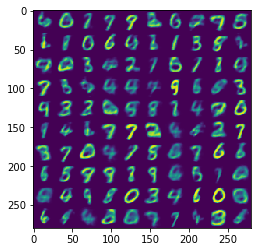

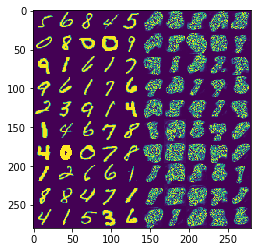

New images saved !
Epoch[4/15], Step [10/600], Reconst Loss: 128.3343, KL Div: 1017.7615
Epoch[4/15], Step [20/600], Reconst Loss: 130.4594, KL Div: 1123.0377
Epoch[4/15], Step [30/600], Reconst Loss: 121.7418, KL Div: 1012.5794
Epoch[4/15], Step [40/600], Reconst Loss: 125.1187, KL Div: 1127.7069
Epoch[4/15], Step [50/600], Reconst Loss: 125.9935, KL Div: 1076.4751
Epoch[4/15], Step [60/600], Reconst Loss: 119.4903, KL Div: 1133.0383
Epoch[4/15], Step [70/600], Reconst Loss: 124.7074, KL Div: 1015.0864
Epoch[4/15], Step [80/600], Reconst Loss: 120.5468, KL Div: 1026.0870
Epoch[4/15], Step [90/600], Reconst Loss: 127.3386, KL Div: 1045.0876
Epoch[4/15], Step [100/600], Reconst Loss: 121.0916, KL Div: 1075.3875
Epoch[4/15], Step [110/600], Reconst Loss: 119.3130, KL Div: 1081.8564
Epoch[4/15], Step [120/600], Reconst Loss: 121.3620, KL Div: 1115.9371
Epoch[4/15], Step [130/600], Reconst Loss: 127.7068, KL Div: 1083.2991
Epoch[4/15], Step [140/600], Reconst Loss: 131.2270, KL Div: 1119.8

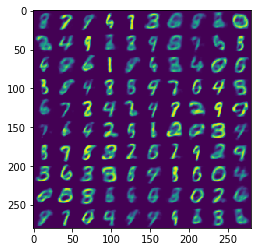

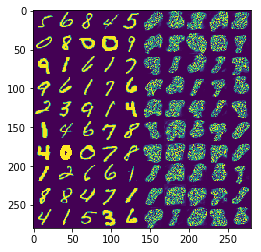

New images saved !
Epoch[5/15], Step [10/600], Reconst Loss: 125.8084, KL Div: 1093.9081
Epoch[5/15], Step [20/600], Reconst Loss: 128.1222, KL Div: 1089.4373
Epoch[5/15], Step [30/600], Reconst Loss: 119.0504, KL Div: 1075.9407
Epoch[5/15], Step [40/600], Reconst Loss: 122.9449, KL Div: 1117.7729
Epoch[5/15], Step [50/600], Reconst Loss: 123.8259, KL Div: 1136.4707
Epoch[5/15], Step [60/600], Reconst Loss: 118.4121, KL Div: 1105.6833
Epoch[5/15], Step [70/600], Reconst Loss: 122.8041, KL Div: 1028.0715
Epoch[5/15], Step [80/600], Reconst Loss: 117.9491, KL Div: 1074.3929
Epoch[5/15], Step [90/600], Reconst Loss: 124.3614, KL Div: 1057.8805
Epoch[5/15], Step [100/600], Reconst Loss: 118.7387, KL Div: 1128.3076
Epoch[5/15], Step [110/600], Reconst Loss: 116.8558, KL Div: 1132.8915
Epoch[5/15], Step [120/600], Reconst Loss: 119.9483, KL Div: 1105.7732
Epoch[5/15], Step [130/600], Reconst Loss: 125.2342, KL Div: 1110.0598
Epoch[5/15], Step [140/600], Reconst Loss: 128.3846, KL Div: 1153.3

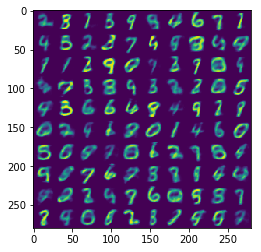

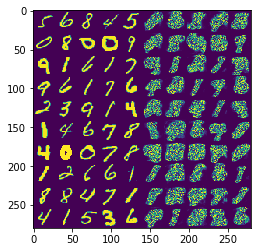

New images saved !
Epoch[6/15], Step [10/600], Reconst Loss: 124.9218, KL Div: 1042.6680
Epoch[6/15], Step [20/600], Reconst Loss: 126.5147, KL Div: 1109.7311
Epoch[6/15], Step [30/600], Reconst Loss: 118.3248, KL Div: 1066.6117
Epoch[6/15], Step [40/600], Reconst Loss: 122.2557, KL Div: 1138.8036
Epoch[6/15], Step [50/600], Reconst Loss: 121.8596, KL Div: 1139.1743
Epoch[6/15], Step [60/600], Reconst Loss: 117.2491, KL Div: 1126.0048
Epoch[6/15], Step [70/600], Reconst Loss: 120.8464, KL Div: 1058.8822
Epoch[6/15], Step [80/600], Reconst Loss: 116.4486, KL Div: 1052.6781
Epoch[6/15], Step [90/600], Reconst Loss: 123.2437, KL Div: 1081.7778
Epoch[6/15], Step [100/600], Reconst Loss: 116.9024, KL Div: 1134.3872
Epoch[6/15], Step [110/600], Reconst Loss: 115.5379, KL Div: 1105.8971
Epoch[6/15], Step [120/600], Reconst Loss: 117.9168, KL Div: 1095.3413
Epoch[6/15], Step [130/600], Reconst Loss: 123.9810, KL Div: 1138.9198
Epoch[6/15], Step [140/600], Reconst Loss: 127.6461, KL Div: 1107.3

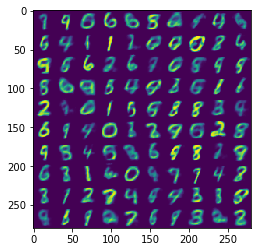

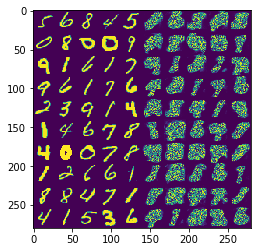

New images saved !
Epoch[7/15], Step [10/600], Reconst Loss: 123.7165, KL Div: 1033.3544
Epoch[7/15], Step [20/600], Reconst Loss: 125.0339, KL Div: 1146.3910
Epoch[7/15], Step [30/600], Reconst Loss: 117.1034, KL Div: 1111.2225
Epoch[7/15], Step [40/600], Reconst Loss: 121.9407, KL Div: 1061.4005
Epoch[7/15], Step [50/600], Reconst Loss: 120.4313, KL Div: 1163.1735
Epoch[7/15], Step [60/600], Reconst Loss: 115.3531, KL Div: 1147.5404
Epoch[7/15], Step [70/600], Reconst Loss: 119.3321, KL Div: 1051.0485
Epoch[7/15], Step [80/600], Reconst Loss: 114.8033, KL Div: 1111.3330
Epoch[7/15], Step [90/600], Reconst Loss: 122.4381, KL Div: 1052.8740
Epoch[7/15], Step [100/600], Reconst Loss: 115.8219, KL Div: 1130.2726
Epoch[7/15], Step [110/600], Reconst Loss: 114.1757, KL Div: 1141.9722
Epoch[7/15], Step [120/600], Reconst Loss: 116.5162, KL Div: 1105.8282
Epoch[7/15], Step [130/600], Reconst Loss: 122.6352, KL Div: 1150.7002
Epoch[7/15], Step [140/600], Reconst Loss: 125.5591, KL Div: 1132.7

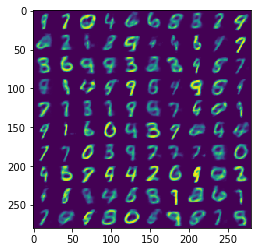

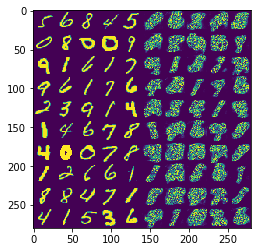

New images saved !
Epoch[8/15], Step [10/600], Reconst Loss: 122.8040, KL Div: 1058.7911
Epoch[8/15], Step [20/600], Reconst Loss: 124.1544, KL Div: 1107.3729
Epoch[8/15], Step [30/600], Reconst Loss: 115.9295, KL Div: 1115.0074
Epoch[8/15], Step [40/600], Reconst Loss: 119.7001, KL Div: 1137.3331
Epoch[8/15], Step [50/600], Reconst Loss: 119.4376, KL Div: 1154.3960
Epoch[8/15], Step [60/600], Reconst Loss: 114.4845, KL Div: 1158.5363
Epoch[8/15], Step [70/600], Reconst Loss: 118.1255, KL Div: 1084.7738
Epoch[8/15], Step [80/600], Reconst Loss: 113.1269, KL Div: 1101.4103
Epoch[8/15], Step [90/600], Reconst Loss: 120.8283, KL Div: 1087.3986
Epoch[8/15], Step [100/600], Reconst Loss: 115.3765, KL Div: 1101.6088
Epoch[8/15], Step [110/600], Reconst Loss: 112.7631, KL Div: 1145.0154
Epoch[8/15], Step [120/600], Reconst Loss: 115.9699, KL Div: 1152.9458
Epoch[8/15], Step [130/600], Reconst Loss: 121.7880, KL Div: 1150.5535
Epoch[8/15], Step [140/600], Reconst Loss: 124.5122, KL Div: 1129.6

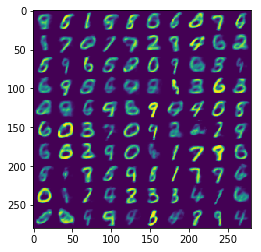

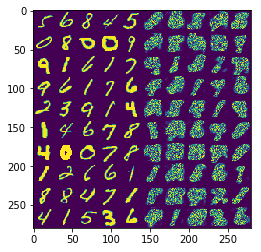

New images saved !
Epoch[9/15], Step [10/600], Reconst Loss: 120.8453, KL Div: 1084.7880
Epoch[9/15], Step [20/600], Reconst Loss: 122.8640, KL Div: 1150.4866
Epoch[9/15], Step [30/600], Reconst Loss: 115.6221, KL Div: 1099.5596
Epoch[9/15], Step [40/600], Reconst Loss: 118.7616, KL Div: 1133.0129
Epoch[9/15], Step [50/600], Reconst Loss: 118.8639, KL Div: 1159.7874
Epoch[9/15], Step [60/600], Reconst Loss: 113.6670, KL Div: 1129.9004
Epoch[9/15], Step [70/600], Reconst Loss: 117.1536, KL Div: 1087.5231
Epoch[9/15], Step [80/600], Reconst Loss: 113.3490, KL Div: 1082.0444
Epoch[9/15], Step [90/600], Reconst Loss: 120.6387, KL Div: 1085.8370
Epoch[9/15], Step [100/600], Reconst Loss: 113.4102, KL Div: 1153.2185
Epoch[9/15], Step [110/600], Reconst Loss: 112.1772, KL Div: 1162.5955
Epoch[9/15], Step [120/600], Reconst Loss: 115.2507, KL Div: 1093.6271
Epoch[9/15], Step [130/600], Reconst Loss: 120.3540, KL Div: 1167.5874
Epoch[9/15], Step [140/600], Reconst Loss: 122.6497, KL Div: 1201.9

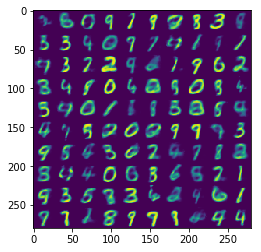

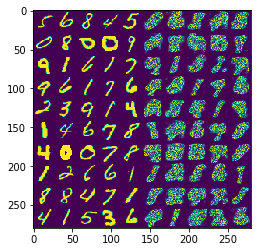

New images saved !
Epoch[10/15], Step [10/600], Reconst Loss: 120.6217, KL Div: 1069.9116
Epoch[10/15], Step [20/600], Reconst Loss: 122.1796, KL Div: 1129.9608
Epoch[10/15], Step [30/600], Reconst Loss: 114.4691, KL Div: 1108.2686
Epoch[10/15], Step [40/600], Reconst Loss: 117.9620, KL Div: 1160.7979
Epoch[10/15], Step [50/600], Reconst Loss: 117.9324, KL Div: 1149.3593
Epoch[10/15], Step [60/600], Reconst Loss: 112.9855, KL Div: 1162.8353
Epoch[10/15], Step [70/600], Reconst Loss: 116.4908, KL Div: 1065.3378
Epoch[10/15], Step [80/600], Reconst Loss: 111.2557, KL Div: 1095.4081
Epoch[10/15], Step [90/600], Reconst Loss: 119.3329, KL Div: 1126.4497
Epoch[10/15], Step [100/600], Reconst Loss: 112.4672, KL Div: 1152.5696
Epoch[10/15], Step [110/600], Reconst Loss: 111.2841, KL Div: 1154.4252
Epoch[10/15], Step [120/600], Reconst Loss: 113.2345, KL Div: 1181.3167
Epoch[10/15], Step [130/600], Reconst Loss: 120.5183, KL Div: 1141.0248
Epoch[10/15], Step [140/600], Reconst Loss: 122.7855, 

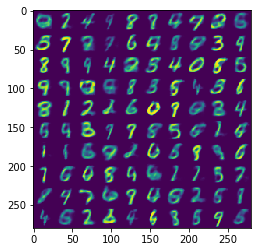

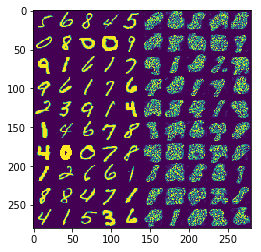

New images saved !
Epoch[11/15], Step [10/600], Reconst Loss: 120.7517, KL Div: 1080.8856
Epoch[11/15], Step [20/600], Reconst Loss: 120.1213, KL Div: 1152.3286
Epoch[11/15], Step [30/600], Reconst Loss: 113.9559, KL Div: 1134.7666
Epoch[11/15], Step [40/600], Reconst Loss: 117.2306, KL Div: 1138.3623
Epoch[11/15], Step [50/600], Reconst Loss: 116.8512, KL Div: 1175.1196
Epoch[11/15], Step [60/600], Reconst Loss: 112.8726, KL Div: 1130.6312
Epoch[11/15], Step [70/600], Reconst Loss: 114.9074, KL Div: 1099.6870
Epoch[11/15], Step [80/600], Reconst Loss: 110.7524, KL Div: 1127.3865
Epoch[11/15], Step [90/600], Reconst Loss: 118.4704, KL Div: 1103.4634
Epoch[11/15], Step [100/600], Reconst Loss: 111.6858, KL Div: 1187.3696
Epoch[11/15], Step [110/600], Reconst Loss: 110.5869, KL Div: 1130.0055
Epoch[11/15], Step [120/600], Reconst Loss: 112.9678, KL Div: 1154.5295
Epoch[11/15], Step [130/600], Reconst Loss: 119.2337, KL Div: 1187.3911
Epoch[11/15], Step [140/600], Reconst Loss: 121.9221, 

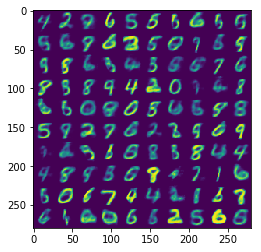

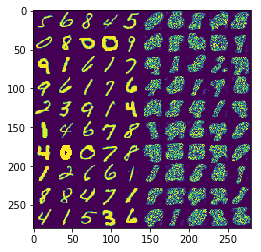

New images saved !
Epoch[12/15], Step [10/600], Reconst Loss: 119.6286, KL Div: 1068.0686
Epoch[12/15], Step [20/600], Reconst Loss: 119.3551, KL Div: 1195.2166
Epoch[12/15], Step [30/600], Reconst Loss: 113.6628, KL Div: 1100.1505
Epoch[12/15], Step [40/600], Reconst Loss: 116.3410, KL Div: 1143.7893
Epoch[12/15], Step [50/600], Reconst Loss: 116.7564, KL Div: 1175.7766
Epoch[12/15], Step [60/600], Reconst Loss: 111.6284, KL Div: 1183.9757
Epoch[12/15], Step [70/600], Reconst Loss: 115.6654, KL Div: 1066.5952
Epoch[12/15], Step [80/600], Reconst Loss: 109.5371, KL Div: 1134.5132
Epoch[12/15], Step [90/600], Reconst Loss: 118.3211, KL Div: 1083.5115
Epoch[12/15], Step [100/600], Reconst Loss: 111.1622, KL Div: 1186.9469
Epoch[12/15], Step [110/600], Reconst Loss: 109.9616, KL Div: 1154.2972
Epoch[12/15], Step [120/600], Reconst Loss: 112.4781, KL Div: 1157.5540
Epoch[12/15], Step [130/600], Reconst Loss: 118.8671, KL Div: 1172.8322
Epoch[12/15], Step [140/600], Reconst Loss: 121.1432, 

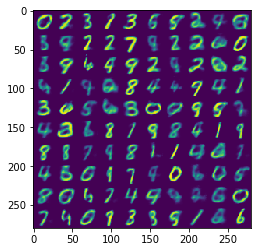

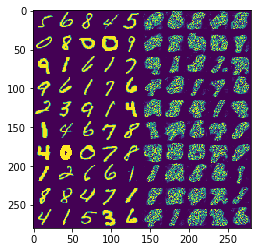

New images saved !
Epoch[13/15], Step [10/600], Reconst Loss: 118.9714, KL Div: 1120.8914
Epoch[13/15], Step [20/600], Reconst Loss: 119.0552, KL Div: 1156.8630
Epoch[13/15], Step [30/600], Reconst Loss: 112.3692, KL Div: 1138.4301
Epoch[13/15], Step [40/600], Reconst Loss: 116.7351, KL Div: 1122.0840
Epoch[13/15], Step [50/600], Reconst Loss: 117.1716, KL Div: 1133.6179
Epoch[13/15], Step [60/600], Reconst Loss: 110.9727, KL Div: 1189.5856
Epoch[13/15], Step [70/600], Reconst Loss: 114.1907, KL Div: 1100.9196
Epoch[13/15], Step [80/600], Reconst Loss: 109.9199, KL Div: 1116.3943
Epoch[13/15], Step [90/600], Reconst Loss: 117.2532, KL Div: 1115.4465
Epoch[13/15], Step [100/600], Reconst Loss: 110.1778, KL Div: 1141.1956
Epoch[13/15], Step [110/600], Reconst Loss: 109.5923, KL Div: 1165.5844
Epoch[13/15], Step [120/600], Reconst Loss: 111.5013, KL Div: 1165.2185
Epoch[13/15], Step [130/600], Reconst Loss: 117.9780, KL Div: 1167.8113
Epoch[13/15], Step [140/600], Reconst Loss: 120.5649, 

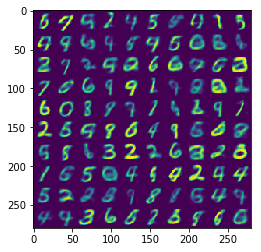

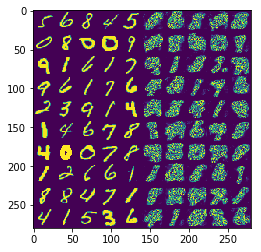

New images saved !
Epoch[14/15], Step [10/600], Reconst Loss: 117.9712, KL Div: 1114.5951
Epoch[14/15], Step [20/600], Reconst Loss: 118.3455, KL Div: 1156.4264
Epoch[14/15], Step [30/600], Reconst Loss: 112.7073, KL Div: 1119.4873
Epoch[14/15], Step [40/600], Reconst Loss: 115.3105, KL Div: 1181.9268
Epoch[14/15], Step [50/600], Reconst Loss: 116.3434, KL Div: 1159.0586
Epoch[14/15], Step [60/600], Reconst Loss: 110.8585, KL Div: 1173.1624
Epoch[14/15], Step [70/600], Reconst Loss: 113.5200, KL Div: 1100.0234
Epoch[14/15], Step [80/600], Reconst Loss: 108.5307, KL Div: 1145.3545
Epoch[14/15], Step [90/600], Reconst Loss: 117.0738, KL Div: 1096.7208
Epoch[14/15], Step [100/600], Reconst Loss: 109.9171, KL Div: 1165.3973
Epoch[14/15], Step [110/600], Reconst Loss: 108.9523, KL Div: 1150.8002
Epoch[14/15], Step [120/600], Reconst Loss: 111.0375, KL Div: 1168.9081
Epoch[14/15], Step [130/600], Reconst Loss: 117.9489, KL Div: 1175.1693
Epoch[14/15], Step [140/600], Reconst Loss: 120.3494, 

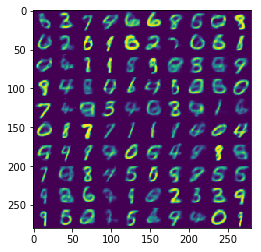

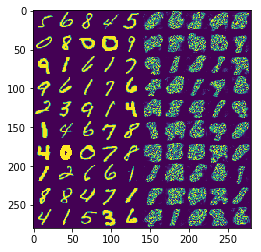

New images saved !
Epoch[15/15], Step [10/600], Reconst Loss: 117.5949, KL Div: 1131.3417
Epoch[15/15], Step [20/600], Reconst Loss: 117.6643, KL Div: 1160.4905
Epoch[15/15], Step [30/600], Reconst Loss: 111.8514, KL Div: 1127.0385
Epoch[15/15], Step [40/600], Reconst Loss: 115.8730, KL Div: 1131.7623
Epoch[15/15], Step [50/600], Reconst Loss: 115.5392, KL Div: 1200.2797
Epoch[15/15], Step [60/600], Reconst Loss: 109.1434, KL Div: 1154.7644
Epoch[15/15], Step [70/600], Reconst Loss: 112.8307, KL Div: 1133.6055
Epoch[15/15], Step [80/600], Reconst Loss: 107.7385, KL Div: 1115.5576
Epoch[15/15], Step [90/600], Reconst Loss: 116.4946, KL Div: 1136.9343
Epoch[15/15], Step [100/600], Reconst Loss: 109.0283, KL Div: 1174.2887
Epoch[15/15], Step [110/600], Reconst Loss: 108.5965, KL Div: 1127.0898
Epoch[15/15], Step [120/600], Reconst Loss: 110.3147, KL Div: 1182.7892
Epoch[15/15], Step [130/600], Reconst Loss: 117.3756, KL Div: 1201.4727
Epoch[15/15], Step [140/600], Reconst Loss: 119.7275, 

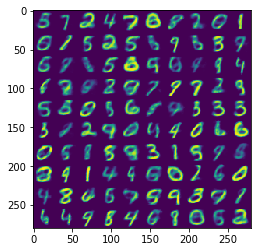

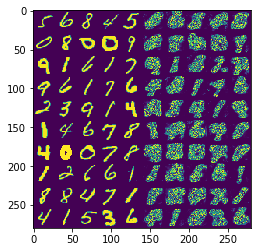

New images saved !


In [10]:
device = '/cpu:0' if tfe.num_gpus() == 0 else '/gpu:0'

with tf.device(device):
    # build model and optimizer
    model = VAE()
    optimizer = tf.train.AdamOptimizer(learning_rate)

    # create the database iterator
    dataset = tf.data.Dataset.from_tensor_slices((x_train,))
    dataset = dataset.shuffle(batch_size * 5)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(10)

    num_batches = x_train.shape[0] // batch_size

    for epoch in range(num_epochs):
        for batch, (images,) in enumerate(dataset):

            with tf.GradientTape() as tape:
                # Forward pass
                x_reconstruction_logits, mu, log_var = model(images)

                # Compute reconstruction loss and kl divergence
                # For KL divergence, see Appendix B in VAE paper or http://yunjey47.tistory.com/43
                # Scaled by `image_size` for each individual pixel.
                reconstruction_loss = image_size * tf.nn.sigmoid_cross_entropy_with_logits(labels=images, logits=x_reconstruction_logits)
                kl_div = - 0.5 * tf.reduce_sum(1. + log_var - tf.square(mu) - tf.exp(log_var), axis=-1)

                # Backprop and optimize
                loss = tf.reduce_mean(reconstruction_loss) + kl_div

            gradients = tape.gradient(loss, model.variables)
            grad_vars = zip(gradients, model.variables)
            optimizer.apply_gradients(grad_vars, tf.train.get_or_create_global_step())

            if (batch + 1) % 10 == 0:
                reconstruction_loss = tf.reduce_mean(reconstruction_loss)
                kl_div = tf.reduce_sum(kl_div)
                print("Epoch[{}/{}], Step [{}/{}], Reconst Loss: {:.4f}, KL Div: {:.4f}"
                      .format(epoch + 1, num_epochs, batch + 1, num_batches, reconstruction_loss.numpy(), kl_div.numpy()))

            if batch > num_batches:
                break

        saver = tfe.Saver(model.variables)
        saver.save('weights/09_vae/weights.ckpt')

        # evaluate
        z = tf.random_normal((batch_size, z_dim))
        out = model.decode(z)  # decode with sigmoid
        out = tf.reshape(out, [-1, 28, 28]).numpy() * 255
        out = out.astype(np.uint8)

        index = 0
        for i in range(0, 280, 28):
            for j in range(0, 280, 28):
                im = out[index]
                im = Image.fromarray(im, mode='L')
                new_im.paste(im, (i, j))
                index += 1

        new_im.save('images/vae_sampled_epoch_%d.png' % (epoch + 1))
        plt.imshow(np.asarray(new_im))
        plt.show()

        # Save the reconstructed images of last batch
        out_logits, _, _ = model(images[:batch_size // 2])
        out = tf.nn.sigmoid(out_logits)  # out is just the logits, use sigmoid
        out = tf.reshape(out, [-1, 28, 28]).numpy() * 255

        images = tf.reshape(images[:batch_size // 2], [-1, 28, 28])

        x_concat = tf.concat([images, out], axis=0).numpy() * 255.
        x_concat = x_concat.astype(np.uint8)

        index = 0
        for i in range(0, 280, 28):
            for j in range(0, 280, 28):
                im = x_concat[index]
                im = Image.fromarray(im, mode='L')
                new_im.paste(im, (i, j))
                index += 1

        new_im.save('images/vae_reconstructed_epoch_%d.png' % (epoch + 1))
        plt.imshow(np.asarray(new_im))
        plt.show()
        print('New images saved !')
        
        